In [1]:
setwd('/import/zhangmeixiang/daa/workflow_results/02Annotion&Express/01Annot&Exp_Annalysis/ExpAnnalysis')

In [2]:
data = read.table('./tpm.txt',header =T,sep = '\t')

In [3]:
colnames(data)

[1] "gene_name" "C_1"       "C_2"       "C_3"       "FHU_1"     "FHU_2"    
[7] "FHU_3"

In [4]:
data = data[!duplicated(data$gene_name),]

In [5]:
group=c(rep("control",3),rep("deal",3)) 

In [6]:
rownames(data)=data[,1]
rownames(data)=data[,1]
data <- data[,-1]

In [250]:
library(tinyarray)




Attaching package: 'tinyarray'


The following object is masked from 'package:dplyr':

    union_all




In [251]:
cg=names(tail(sort(apply(data,1,sd)),3000))
n=data[cg,]

In [271]:
pca.res <- prcomp(t(n), scale. = T, center = T)
pca.res

Standard deviations (1, .., p=6):
[1] 5.069451e+01 1.156714e+01 1.075039e+01 9.579738e+00 9.430053e+00
[6] 2.616886e-14

Rotation (n x k) = (3000 x 6):
                        PC1           PC2           PC3           PC4
Gm7862         0.0143981954 -1.682879e-02  2.164953e-02  4.462231e-02
Pef1           0.0195698606  8.532145e-03  3.554989e-04 -5.176491e-03
Cpeb4         -0.0194418364  1.156372e-02 -6.127067e-03 -6.914909e-03
B4galt3        0.0186195939 -1.206592e-02 -1.060074e-02  1.445798e-03
Wtap          -0.0185747495  2.535341e-02  4.156071e-03  6.833101e-03
Vps35l        -0.0186674847  2.069634e-02 -1.340700e-02 -8.266206e-03
Gfer           0.0189889242  1.358037e-02  4.693834e-03 -1.537354e-02
Ankrd52       -0.0195801420 -2.722957e-03  7.919616e-03 -5.677417e-04
Pex16          0.0193800841 -2.615657e-04 -5.456769e-03 -1.441224e-02
Efhd2          0.0195594887  9.544628e-04  1.785167e-03 -7.531184e-03
Zfr           -0.0111549014  6.075773e-02 -2.070371e-02 -1.806904e-02
Dgcr6   

In [274]:
tmp <- as.data.frame(pca.res$x)
head(tmp)

,PC1,PC2,PC3,PC4,PC5,PC6
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C_1,-45.07268,7.647977,-7.028708,-7.910248,12.755723,2.301284e-14
C_2,-46.45659,10.393849,-3.253233,9.641043,-11.217539,2.342571e-14
C_3,-47.26495,-17.458860,10.553676,-1.852263,-1.269808,1.956768e-14
FHU_1,46.53801,-1.294708,3.034218,13.885974,10.027138,2.228773e-14
FHU_2,47.63464,10.248501,12.343761,-9.367530,-4.464692,2.456661e-14
FHU_3,44.62157,-9.536758,-15.649714,-4.396975,-5.830822,2.188874e-14


In [275]:
tmp$group <- group
head(tmp)

,PC1,PC2,PC3,PC4,PC5,PC6,group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
C_1,-45.07268,7.647977,-7.028708,-7.910248,12.755723,2.301284e-14,control
C_2,-46.45659,10.393849,-3.253233,9.641043,-11.217539,2.342571e-14,control
C_3,-47.26495,-17.458860,10.553676,-1.852263,-1.269808,1.956768e-14,control
FHU_1,46.53801,-1.294708,3.034218,13.885974,10.027138,2.228773e-14,deal
FHU_2,47.63464,10.248501,12.343761,-9.367530,-4.464692,2.456661e-14,deal
FHU_3,44.62157,-9.536758,-15.649714,-4.396975,-5.830822,2.188874e-14,deal


Too few points to calculate an ellipse
Too few points to calculate an ellipse


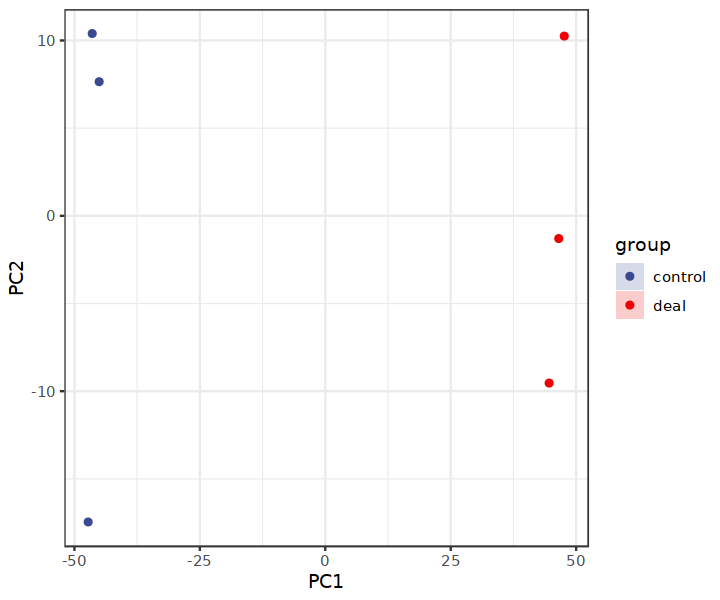

In [276]:
library(ggplot2)
library(ggsci)

ggplot(tmp, aes(PC1, PC2))+
  geom_point(aes(color = group))+
  stat_ellipse(aes(fill=group), alpha = 0.2,
               geom ="polygon",type = "norm")+
  scale_fill_aaas()+
  scale_color_aaas()+
  theme_bw()

In [277]:
library(scatterplot3d)

Warning message:
"package 'scatterplot3d' was built under R version 4.2.3"


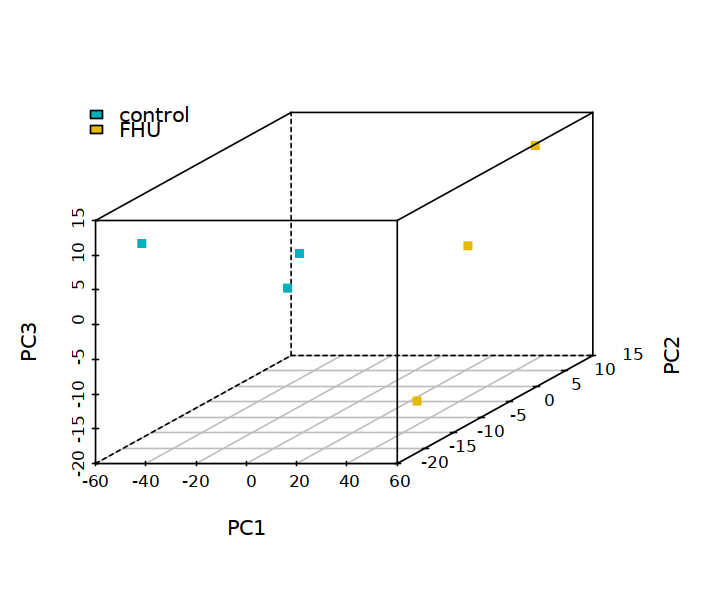

In [280]:
scatterplot3d(tmp[,1:3], # 第1-3主成分
              # 颜色长度要和样本长度一样，且对应！
              color = rep(c("#00AFBB", "#E7B800"),each=3),
              pch = 15,
              lty.hide = 2
              )
legend("topleft",c('control','FHU'),
fill=c("#00AFBB", "#E7B800"),box.col=NA)

In [18]:
library(limma)
library(DESeq2)
library(edgeR)

Warning message:
"package 'edgeR' was built under R version 4.2.3"


In [19]:
group_list = factor(group)
design <- model.matrix(~0+group_list)
rownames(design) = colnames(data)
colnames(design) <- levels(group_list)

keep_gene
FALSE  TRUE 
29748 25543 

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Ftl1,0.8324850,13.602251,160.58523,2.153262e-12,5.500078e-08,19.61926
Fth1,0.9712008,12.124229,128.29665,8.580987e-12,1.095921e-07,18.26295
Hmox1,2.9004889,8.290671,103.66065,3.189953e-11,2.321305e-07,16.52275
Srxn1,3.3792743,7.673404,101.48450,3.635133e-11,2.321305e-07,16.18964
Tyrp1,-1.8879445,11.212001,-89.83180,7.702846e-11,3.935076e-07,16.05166
Gm10925,-0.4126168,13.812185,-84.97823,1.084313e-10,4.616102e-07,15.28192


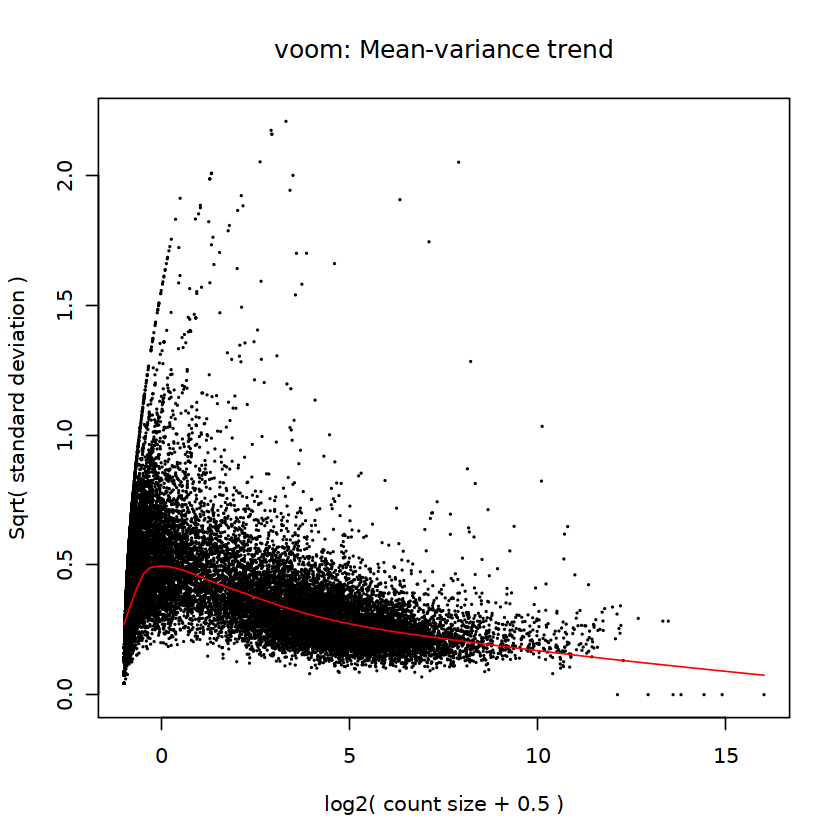

In [27]:
DGElist <- DGEList( counts = data, group = group_list )
keep_gene <- rowSums( cpm(DGElist) > 0.01 ) >= 0.1 # 自定义
table(keep_gene)
DGElist <- DGElist[ keep_gene, , keep.lib.sizes = FALSE ]

DGElist <- calcNormFactors( DGElist )
v <- voom(DGElist, design, plot = TRUE, normalize = "quantile")
fit <- lmFit(v, design)
cont.matrix <- makeContrasts(contrasts = c('deal-control'), levels = design)

fit2 <- contrasts.fit(fit, cont.matrix)
fit2 <- eBayes(fit2)

nrDEG_limma_voom = topTable(fit2, coef = 'deal-control', n = Inf)
nrDEG_limma_voom = na.omit(nrDEG_limma_voom)
head(nrDEG_limma_voom)

In [174]:
padj = 0.05 # 自定义
foldChange= 0.8 # 自定义
nrDEG_limma_voom_signif = nrDEG_limma_voom[(nrDEG_limma_voom$P.Value < padj & 
                          (nrDEG_limma_voom$logFC>foldChange | nrDEG_limma_voom$logFC<(-foldChange))),]
nrDEG_limma_voom_signif = nrDEG_limma_voom_signif[order(nrDEG_limma_voom_signif$logFC),]
#save(nrDEG_limma_voom_signif, file = 'nrDEG_limma_voom_signif')

In [175]:
gene = c('Dlat','Fdx1','Gpx4','Atp7b','Hif1a','Ncoa4','Map1lc3a')

In [176]:
nrDEG_limma_voom[gene,]

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Dlat,0.04484423,6.0180522,0.6164892,5.596491e-01,6.746970e-01,-8.0548104
Fdx1,0.65842230,4.6314762,11.9379589,1.728288e-05,2.623190e-04,3.3274931
Gpx4,0.51553063,9.1416789,24.9568375,2.008032e-07,1.587962e-05,7.6472341
Atp7b,-0.53247539,-0.5576042,-5.8254933,1.025028e-03,5.464891e-03,-0.5545721
Hif1a,-0.09876212,6.2902563,-3.6676049,1.000556e-02,3.420123e-02,-4.1781260
Ncoa4,0.12359544,5.3134476,2.8111660,2.985206e-02,8.209638e-02,-5.1786977
Map1lc3a,1.61623683,5.3443499,23.2037604,3.132102e-07,1.965683e-05,7.6736771


In [177]:
# deseq2 = read.table('./deseq2.res.txt',header =T,sep = '\t')

# deseq2 = deseq2[!duplicated(deseq2$gene_name),]

# rownames(deseq2)=deseq2[,1]
# rownames(deseq2)=deseq2[,1]
# deseq2 <- deseq2[,-1]

# deseq2[gene,]

# data[gene,]

In [178]:
diff = nrDEG_limma_voom

In [179]:
diff$group = as.factor(ifelse(diff$P.Value < padj & abs(diff$logFC) >= foldChange, 
                                 ifelse(diff$logFC> foldChange ,'Up','Down'),'NoSignifi'))
table(diff$group)


     Down NoSignifi        Up 
     1191     23209      1143 

In [180]:
head(diff,2)

,logFC,AveExpr,t,P.Value,adj.P.Val,B,group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Ftl1,0.8324850,13.60225,160.5852,2.153262e-12,5.500078e-08,19.61926,Up
Fth1,0.9712008,12.12423,128.2966,8.580987e-12,1.095921e-07,18.26295,Up


In [181]:
library(dplyr)

In [182]:
res = diff

In [183]:
top_5 <- bind_rows(   
      res %>%
        filter(group == 'Up') %>%
        arrange(P.Value, desc(logFC)) %>%
        head(0),
      res %>%
        filter(group == 'Down') %>%
        arrange(P.Value, desc(logFC)) %>%
        head(0)
    )

In [184]:
library(ggpubr)
library(ggplot2)
    library(dplyr)
    library(ggrepel)
    library(ggplot2)
    library(cowplot)

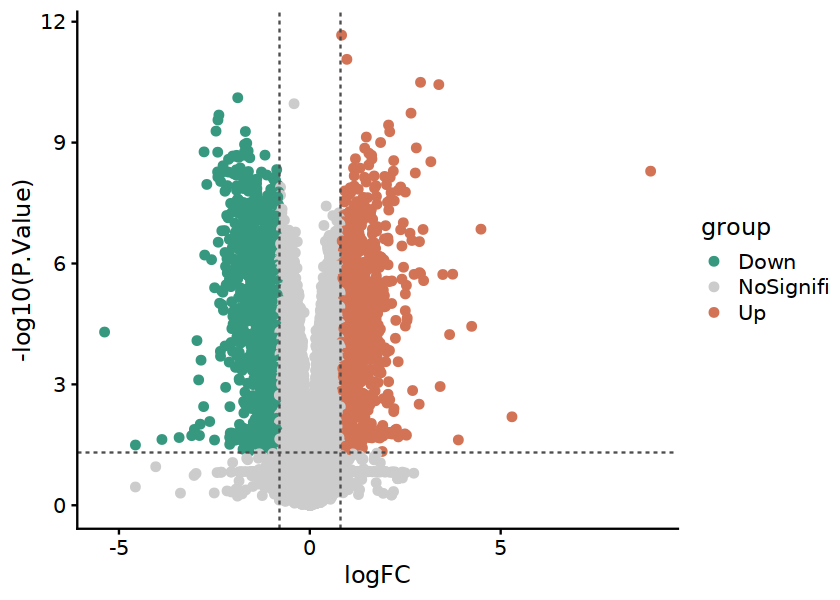

In [187]:

    ggplot(data=res,aes(x=logFC,y=-log10(P.Value)))+
    geom_point(aes(color=group),size=2)+
    geom_hline(yintercept = -log10(0.05), linetype="dashed",color="grey30")+
    geom_vline(xintercept = c(-.8,.8),linetype="dashed",color="grey30")+
    geom_text_repel(data=top_5,aes(x= logFC,y= -log10(P.Value),label= rownames(top_5)))+
    scale_color_manual(values = c("#35987F","grey80","#D27356"))+
    theme_half_open() 
    #ggsave('Volcano.pdf',height = 8,width = 8)
    
   

In [70]:
jiaoji = diff %>%  dplyr::filter(group != 'NoSignifi') %>%  rownames()

In [72]:
gene_symbol <- bitr(geneID = jiaoji,  
                        fromType="SYMBOL",   
                        toType=c("ENTREZID"),  
                        OrgDb="org.Mm.eg.db")
    gene <- gene_symbol[,2]
    BP <- enrichGO(gene = gene,  
                   keyType = "ENTREZID",  
                   OrgDb=org.Mm.eg.db,  
                   ont = "ALL",   
                   pvalueCutoff = 0.05,  
                   pAdjustMethod = "fdr", 
                   minGSSize = 5,   
                   maxGSSize = 500,  
                   qvalueCutoff = 0.05,  
                   readable = TRUE) 

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(geneID = jiaoji, fromType = "SYMBOL", toType = c("ENTREZID"), :
"10.11% of input gene IDs are fail to map..."


In [81]:
BP@result %>%   filter(grepl('oxidative stress',Description))

,ONTOLOGY,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0006979,BP,GO:0006979,response to oxidative stress,59/1830,407/28943,2.275529e-09,1.209478e-07,9.602951e-08,Hmox1/Srxn1/Slc7a11/Nqo1/Txnip/Gclm/Met/Txnrd1/Ect2/G6pdx/Lig1/Lancl1/Myef2/Gsr/Melk/Fancd2/Cat/Sfpq/Nfe2l1/Prdx6/Lcn2/Rcan1/Hspb1/Aptx/Il6/Fbln5/Dhfr/Parp1/Rbm11/Trex1/Prnp/Prdx5/Acox2/Gch1/Pycr1/Idh1/Plk3/Apoe/Fos/Pnpla8/Ddias/Ccs/Zc3h12a/Mgst1/Atp7a/Ptk2b/Aldh3b1/Capn1/Sphk1/Prr5l/Etv5/Tnfaip3/Meak7/Net1/Mapk13/Mapt/Epas1/Mmp2/Lck,59
GO:0034599,BP,GO:0034599,cellular response to oxidative stress,44/1830,273/28943,1.019413e-08,4.898770e-07,3.889500e-07,Hmox1/Srxn1/Slc7a11/Nqo1/Met/Ect2/G6pdx/Lancl1/Gsr/Melk/Fancd2/Cat/Sfpq/Nfe2l1/Lcn2/Hspb1/Il6/Fbln5/Dhfr/Parp1/Rbm11/Trex1/Prdx5/Gch1/Pycr1/Fos/Pnpla8/Ddias/Ccs/Zc3h12a/Mgst1/Atp7a/Aldh3b1/Capn1/Sphk1/Prr5l/Etv5/Tnfaip3/Meak7/Net1/Mapk13/Mapt/Epas1/Mmp2,44


In [85]:
# https://www.wikipathways.org/pathways/WP4466.html

[1] 55  6

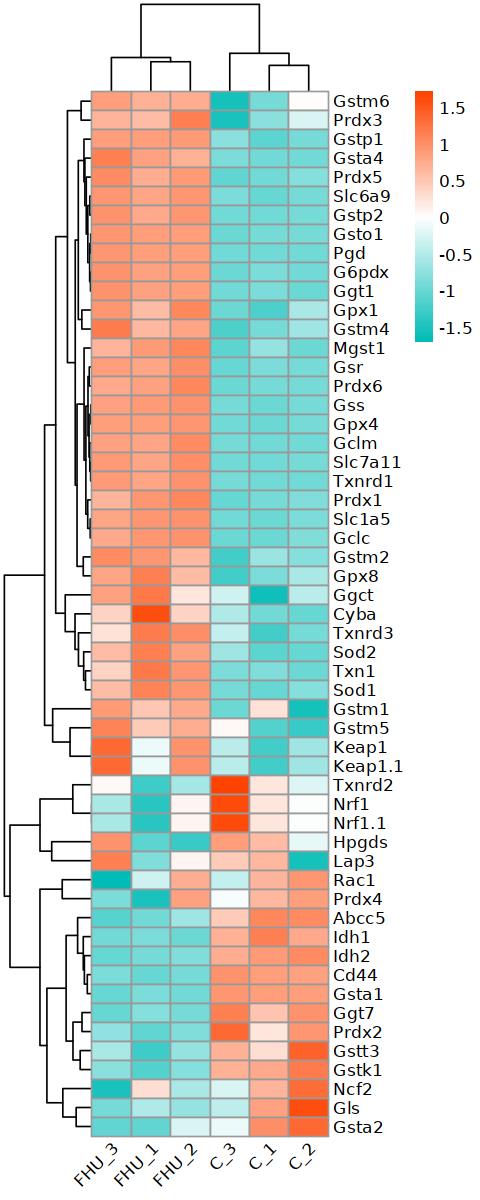

In [357]:
PATH = read.table('./pathway.txt',header =T)

forplot = data[PATH$Label,]

library(pheatmap)

forplot = na.omit(forplot)

forplot = forplot[rowSums(forplot) >30,]

#da=log2(data1+1)
dat=t(scale(t(forplot))) # 'scale'可以对log(fpkm+1)数值进行归一化
#处理数据
dat[dat>2]=2
dat[dat<(-2)]= -2
dim(dat)

dat = dat[complete.cases(dat), ]

options(repr.plot.width = 4,repr.plot.height = 10)

xx = pheatmap(dat,
         cluster_rows = TRUE,
         cluster_cols = TRUE,
         show_rownames=TRUE,
         show_colnames = TRUE,
          scale="none",
          #cluster_cols = F,
          fontsize_row = 10,
          fontsize_col = 10,
          #color = colorRampPalette(c("navy", "white", "firebrick3"))(100),
          color = colorRampPalette(c("#00BCB6", "white", "#FE4300"))(100),#换颜色
          angle_col = 45 #修改横轴坐标名倾斜度
)

In [131]:
pathway<-read.gmt("path.gmt")

In [137]:
alldiff <- nrDEG_limma_voom[order(nrDEG_limma_voom$logFC,decreasing = T),]

In [138]:
FCgenelist <- alldiff$logFC                 # 把数值保存到一维向量中
names(FCgenelist) <- row.names(alldiff)

In [139]:
y <- GSEA(FCgenelist,TERM2GENE =pathway)

preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (14.71% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
leading edge analysis...

done...



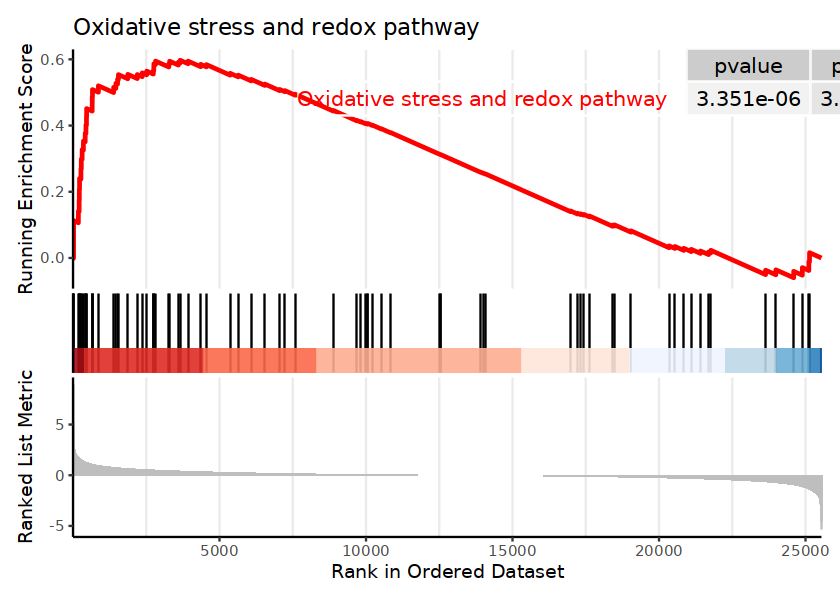

In [155]:
options(repr.plot.width = 7,repr.plot.height = 5)
#选择单个gene set作图
egmtd <- data.frame(y)
library(enrichplot)
gseaplot2(y, geneSetID = 1, title = y$Description[1],ES_geom = "line",
          pvalue_table = TRUE,
          color = 'red')

In [74]:
library(enrichplot)

Warning message:
"package 'enrichplot' was built under R version 4.2.2"


Warning message in emapplot.enrichResult(x, showCategory = showCategory, ...):
"Use 'cex.params = list(category_label = your_value)' instead of 'cex_label_category'.
 The cex_label_category parameter will be removed in the next version."
Warning message in emapplot.enrichResult(x, showCategory = showCategory, ...):
"Use 'cex.params = list(line = your_value)' instead of 'cex_line'.
 The cex_line parameter will be removed in the next version."
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


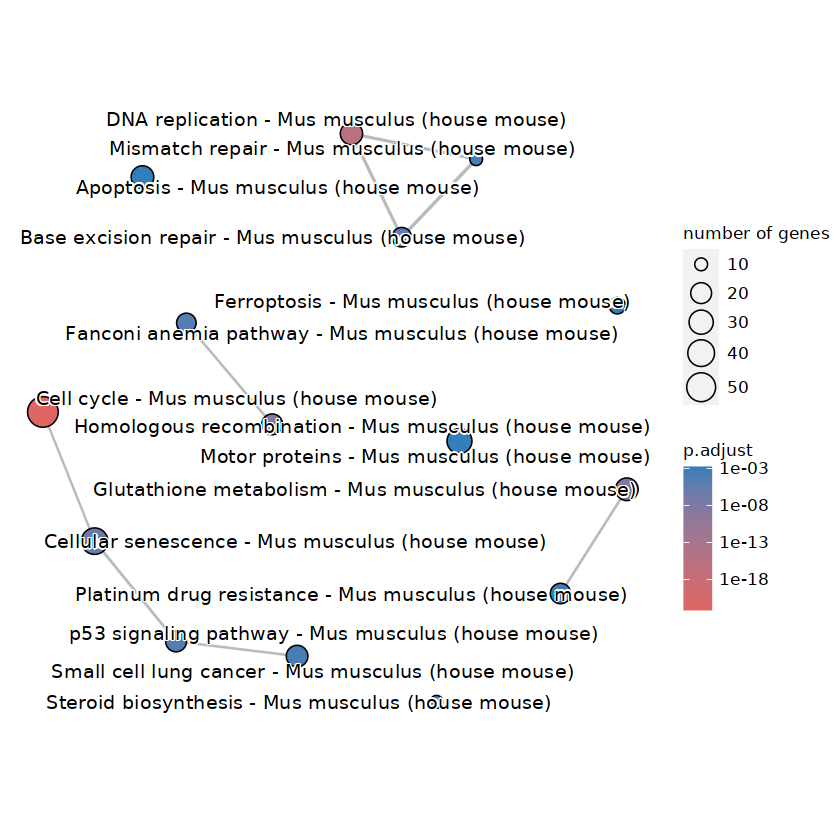

In [77]:
ek <- enrichKEGG(gene =gene , 
                   organism = "mmu",  
                   pvalueCutoff =1, 
                   qvalueCutoff = 1) 
    keggres = ek@result
    write.csv(keggres,file = 'kegg_results.csv')
    KEGG2 <- pairwise_termsim(ek)
    emapplot(KEGG2, cex_label_category=.8, cex_line=.5,showCategory = 15) + 
      ggplot2::scale_fill_continuous(low = "#e06663", high = "#327eba", name = "p.adjust",
                            guide = ggplot2::guide_colorbar(reverse = TRUE, order=2.5), trans='log10')

In [211]:
mixedToFloat <- function(x){
    x <- sapply(x, as.character)
    is.integer  <- grepl("^-?\\d+$", x)
    is.fraction <- grepl("^-?\\d+\\/\\d+$", x)
    is.float <- grepl("^-?\\d+\\.\\d+$", x)
    is.mixed    <- grepl("^-?\\d+ \\d+\\/\\d+$", x)
    stopifnot(all(is.integer | is.fraction | is.float | is.mixed))
    
    numbers <- strsplit(x, "[ /]")
    
    ifelse(is.integer,  as.numeric(sapply(numbers, `[`, 1)),
           ifelse(is.float,    as.numeric(sapply(numbers, `[`, 1)),
                  ifelse(is.fraction, as.numeric(sapply(numbers, `[`, 1)) /
                             as.numeric(sapply(numbers, `[`, 2)),
                             as.numeric(sapply(numbers, `[`, 1)) +
                             as.numeric(sapply(numbers, `[`, 2)) /
                             as.numeric(sapply(numbers, `[`, 3)))))
}

In [212]:
keggres$GeneRatio = mixedToFloat(keggres$GeneRatio)

In [218]:
 library (dplyr)
library (tidyr)

keggres = keggres %>% separate(Description, c('Description', ' col2 '),sep = '-')

Warning message:
"Expected 2 pieces. Additional pieces discarded in 66 rows [16, 22, 24, 26, 31,
34, 39, 40, 42, 47, 54, 56, 67, 71, 72, 73, 81, 83, 98, 100, ...]."


In [224]:
keggres1 = keggres[c(1:20),]

In [225]:
options(repr.plot.width  = 6)

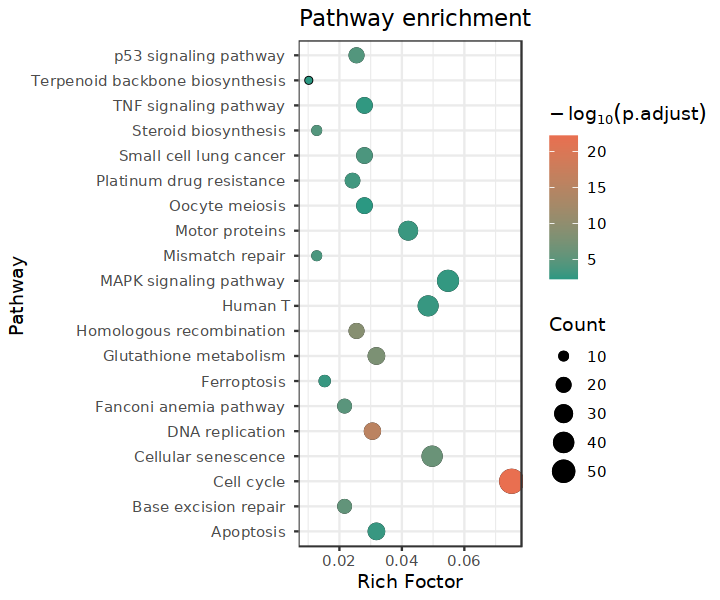

In [227]:
p = ggplot(keggres1,aes(GeneRatio	,Description))
p=p + geom_point()  
p=p + geom_point(aes(size=Count))
pbubble = p+ geom_point(aes(size=Count,color=-1*log10(p.adjust)))
pr = pbubble+scale_color_gradient(low="#2B9882",high = "#E96F50")
pr = pr+labs(color=expression(-log[10](p.adjust)),size="Count",  
                        x="Rich Foctor",y="Pathway ",title="Pathway enrichment")
pr + theme_bw()

In [233]:
keggres[c('mmu04140','mmu00020'),]

,ID,Description,col2,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
mmu04140,mmu04140,Autophagy,animal,0.020382166,167/9720,0.2734580,0.6393524,0.5270502,18761/20130/18412/66734/67790/18710/17532/57436/15289/73205/16438/93739/54636/97998/16367/22264,16
mmu00020,mmu00020,Citrate cycle (TCA cycle),Mus musculus (house mouse),0.003821656,32/9720,0.4840457,0.8349188,0.6882654,104112/269951/15926,3


In [66]:
library(clusterProfiler)
library(org.Mm.eg.db)



Registered S3 methods overwritten by 'treeio':
  method              from    
  MRCA.phylo          tidytree
  MRCA.treedata       tidytree
  Nnode.treedata      tidytree
  Ntip.treedata       tidytree
  ancestor.phylo      tidytree
  ancestor.treedata   tidytree
  child.phylo         tidytree
  child.treedata      tidytree
  full_join.phylo     tidytree
  full_join.treedata  tidytree
  groupClade.phylo    tidytree
  groupClade.treedata tidytree
  groupOTU.phylo      tidytree
  groupOTU.treedata   tidytree
  is.rooted.treedata  tidytree
  nodeid.phylo        tidytree
  nodeid.treedata     tidytree
  nodelab.phylo       tidytree
  nodelab.treedata    tidytree
  offspring.phylo     tidytree
  offspring.treedata  tidytree
  parent.phylo        tidytree
  parent.treedata     tidytree
  root.treedata       tidytree
  rootnode.phylo      tidytree
  sibling.phylo       tidytree

clusterProfiler v4.6.2  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProf

In [284]:
 gene_symbol <- bitr(geneID = jiaoji,  
                        fromType="SYMBOL",   
                        toType=c("ENTREZID"),  
                        OrgDb="org.Mm.eg.db")
    gene <- gene_symbol[,2]
    all <- enrichGO(gene = gene,  
                   keyType = "ENTREZID",  
                   OrgDb=org.Mm.eg.db,  
                   ont = "ALL",   
                   pvalueCutoff = 0.05,  
                   pAdjustMethod = "fdr", 
                   minGSSize = 5,   
                   maxGSSize = 500,  
                   qvalueCutoff = 0.05,  
                   readable = TRUE) 

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(geneID = jiaoji, fromType = "SYMBOL", toType = c("ENTREZID"), :
"10.11% of input gene IDs are fail to map..."


In [305]:
 all %>% filter(ONTOLOGY	 == 'BP') %>% head(5) -> bp
 all %>% filter(ONTOLOGY	 == 'CC') %>% head(5) -> cc
 all %>% filter(ONTOLOGY	 == 'MF') %>% head(5) -> mf


In [306]:
go = rbind(bp,cc,mf)

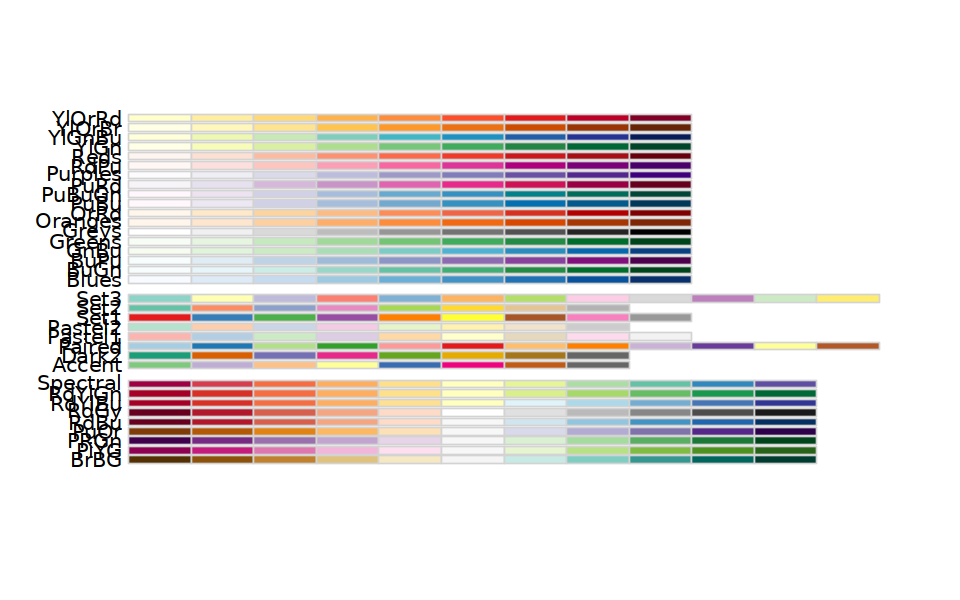

In [307]:
library(ggplot2)
library(RColorBrewer)
display.brewer.all()
color <- brewer.pal(3,"Dark2")
colorl <- rep(color,each=5)

In [308]:
go$Description<- factor(go$Description,levels=go$Description)

In [309]:
options(repr.plot.width = 8)

Warning message:
"Vectorized input to `element_text()` is not officially supported.
i Results may be unexpected or may change in future versions of ggplot2."


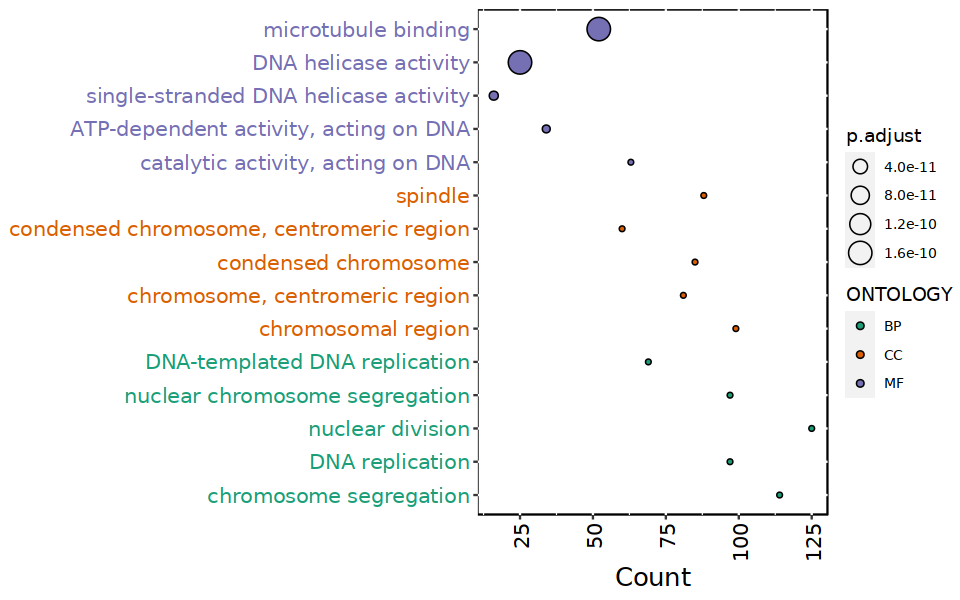

In [310]:
ggplot(go) +
  aes(x = Description, y = Count, fill = ONTOLOGY,size=p.adjust) +
  geom_point(shape=21,color="black") +
  #scale_fill_hue() +
  xlab("Counts")+
  scale_fill_manual(values =color)+
  coord_flip()+
  theme(
    axis.title=element_text(size=15,face="plain",color="black"),
    axis.text = element_text(size=12,face="plain",color="black"),
    axis.text.x = element_text(angle = 90,hjust=1,vjust=0.6),
    axis.title.y = element_blank(),
    axis.text.y = element_text(colour = colorl),
    #legend.title = element_blank(),
    legend.text = element_text(size = 8, face = "bold"),
    legend.margin = margin(t = 0, r = 0, b = 0, l = 0, unit = "pt"),
    #legend.direction = "horizontal",
    #legend.position = c(0.5,0.9),
    legend.background = element_blank(),
    panel.background = element_rect(fill = "transparent",colour = "black"),
    plot.background = element_blank()
  )

In [316]:
options(repr.plot.height = 8)

Warning message:
"Vectorized input to `element_text()` is not officially supported.
i Results may be unexpected or may change in future versions of ggplot2."


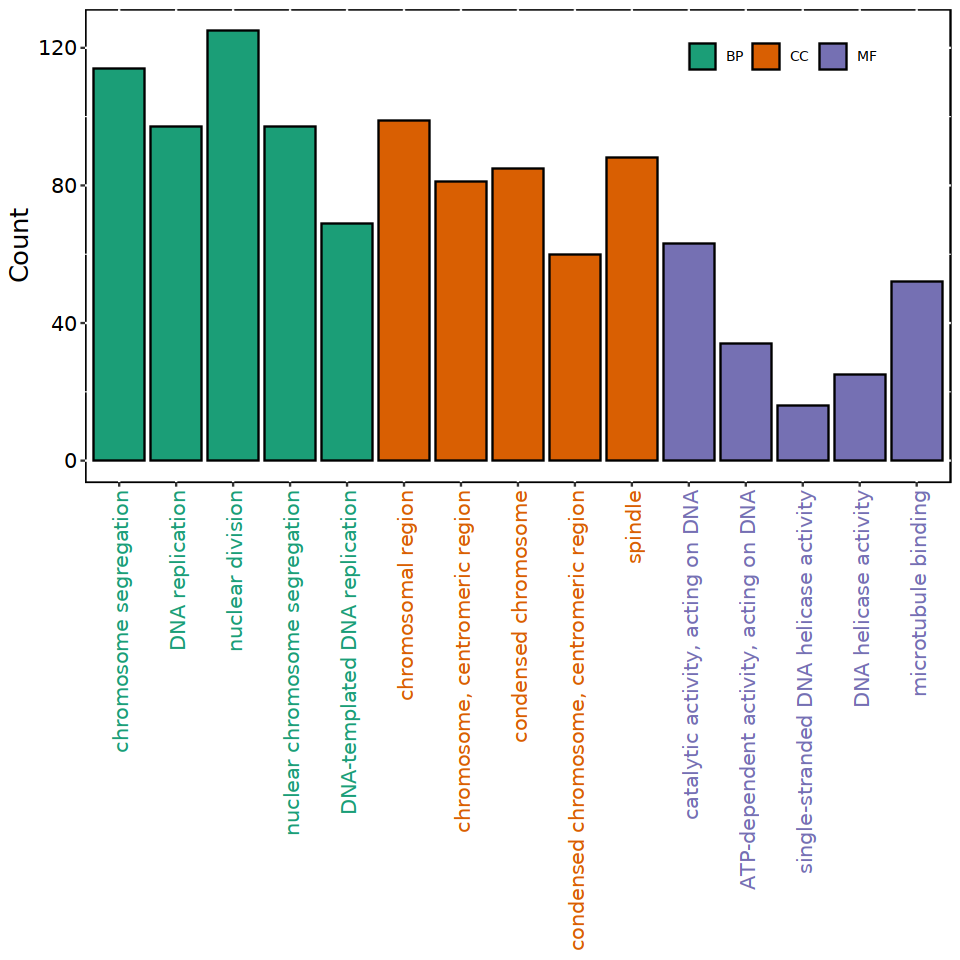

In [317]:

ggplot(go) +
  aes(x = Description, y = Count, fill = ONTOLOGY) +
  geom_bar(stat = "identity",colour="black") +
  #scale_fill_hue() +
  scale_fill_manual(values =color)+
  theme(
    axis.title=element_text(size=15,face="plain",color="black"),
    axis.text = element_text(size=12,face="plain",color="black"),
    axis.text.x = element_text(angle = 90,colour = colorl,hjust=1,vjust=0.6),
    axis.title.x = element_blank(),
    legend.title = element_blank(),
    legend.text = element_text(size = 8, face = "bold"),
    legend.margin = margin(t = 0, r = 0, b = 0, l = 0, unit = "pt"),
    legend.direction = "horizontal",
    legend.position = c(0.8,0.9),
    legend.background = element_blank(),
    panel.background = element_rect(fill = "transparent",colour = "black"),
    
    plot.background = element_blank()
  )

In [318]:
library(GOplot)

Loading required package: ggdendro

Loading required package: gridExtra

Warning message:
"package 'gridExtra' was built under R version 4.2.3"

Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


The following object is masked from 'package:Biobase':

    combine


The following object is masked from 'package:BiocGenerics':

    combine




In [319]:
head(diff,2)

,logFC,AveExpr,t,P.Value,adj.P.Val,B,group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Ftl1,0.8324850,13.60225,160.5852,2.153262e-12,5.500078e-08,19.61926,Up
Fth1,0.9712008,12.12423,128.2966,8.580987e-12,1.095921e-07,18.26295,Up


In [320]:
genelist <- diff %>% 
  tibble::rownames_to_column(var="ID") 

df <- as.data.frame(diff)
new_df <- df[which(df$group=='Up'|df$group=='Down'),]

In [323]:
Genelist <- genelist[genelist$ID %in% rownames(new_df),]

## david

In [330]:
head(GO_all,2)

,ONTOLOGY,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0007059,BP,GO:0007059,chromosome segregation,114/1830,369/28943,6.427971e-48,4.509865e-44,3.580718e-44,Top2a/Mki67/Knstrn/Ube2c/Ccnb1/Smc2/Plk1/Mad2l1/Kif11/Ncapg/Prc1/Bub1/Ect2/Aurkb/Kif2c/Hjurp/Ncapg2/Slc25a5/Akap8/Ncapd2/Racgap1/Ttk/Birc5/Cenph/Brca1/Nuf2/Zwint/Sgo2a/Bub1b/Tacc3/Phf10/Fbxo5/Tubg1/Nek2/Ncaph/Ndc1/Fancd2/Cdc6/Smc1a/Incenp/Ccne1/Sfpq/Kif22/Ncapd3/Sgo1/Smc3/Kif14/Nusap1/Kif4/Kif18b/Ccne2/Spc25/Baz1b/Kif23/Cdt1/Zw10/Dsn1/Ndc80/Cdc20/Atrx/Cenpf/Cdca5/Smc4/Kif18a/Spdl1/Spag5/Fen1/Nde1/Cdca8/Zwilch/Fam83d/Mis18a/Kntc1/Ska2/Ctcf/Gen1/Dlgap5/Ska3/Pmf1/Cdca2/Esco2/Brip1/Ddx11/Cep192/Ankle1/Oip5/Mad1l1/Cenpn/Eme1/Kifc5b/Chtf18/Ska1/Gem/Rab11a/Knl1/Trip13/Haspin/Dscc1/Cenpe/Psmc3ip/Cenpk/Rmi2/Xrcc3/Atm/Cenps/Spice1/Usp44/Meiob/Espl1/Cit/Spc24/Nsl1/Fancm/Prap1,114
GO:0006260,BP,GO:0006260,DNA replication,97/1830,282/28943,1.659547e-45,5.821689e-42,4.622274e-42,Rrm2/Pclaf/Cdk2/Cdk1/Met/Mcm5/Mcm4/Topbp1/Tbrg1/Mcm6/Mcm2/Lig1/Ccna2/Pole2/Rrm1/Brca1/Nasp/Kctd13/Dhx9/Fbxo5/Pcna/Mcm10/Rfc3/Cdc6/Cdc45/Ccne1/Prim1/Il6/Smc3/Pole/Dtl/Gmnn/Chaf1b/Ccne2/Dbf4/Polh/Cdt1/Prim2/E2f8/Chaf1a/Atrx/Polq/Trex1/Pold3/Atad5/Ticrr/Fam111a/Mcm3/Fen1/Gins1/Pola1/Nbn/Bard1/Gen1/Rpa2/Dna2/E2f7/Esco2/Cdc7/Ddx11/Orc1/Exd2/Tipin/Pif1/Timeless/Etaa1/Rfc5/Eme1/Pold1/Mms22l/Chtf18/Rfc4/Mcm7/Pold4/Pola2/Rad51/Dscc1/Id3/Zgrf1/Polg2/Top1mt/Tonsl/Rtel1/Traip/Donson/Wdhd1/Rbbp8/Rmi2/Pdgfb/Bcar3/Gins3/Cenps/Tk2/Blm/Fhit/Zranb3/Fancm,97


In [329]:
GO_all = all@result

In [331]:
library(stringr)
GO_all$geneID <- gsub(pattern = '/',replacement = ', ',GO_all$geneID)

Warning message:
"package 'stringr' was built under R version 4.2.3"


In [333]:


david <- GO_all %>% 
  tibble::rownames_to_column(var="wait") 

David <- david %>% 
  dplyr::select(c(2:4,10,8)) %>% 
  dplyr::rename(Category = ONTOLOGY,
                Term = Description,
                Genes = geneID,
                adj_pval = p.adjust) %>% 
  filter(adj_pval < 0.05)

# 交互
circ <- circle_dat(David,Genelist)

In [337]:
library(grDevices)

Warning message in stats::runif(scount[sc], df$x[sc] + 0.06, (df$x[sc] + df$xmax[sc] - :
"NAs produced"
Warning message in stats::runif(scount[sc], df$x[sc] + 0.06, (df$x[sc] + df$xmax[sc] - :
"NAs produced"
Warning message in stats::runif(scount[sc], df$x[sc] + 0.06, (df$x[sc] + df$xmax[sc] - :
"NAs produced"
Warning message in stats::runif(scount[sc], df$x[sc] + 0.06, (df$x[sc] + df$xmax[sc] - :
"NAs produced"
Warning message:
"Removed 355 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 355 rows containing missing values (`geom_point()`)."


NULL

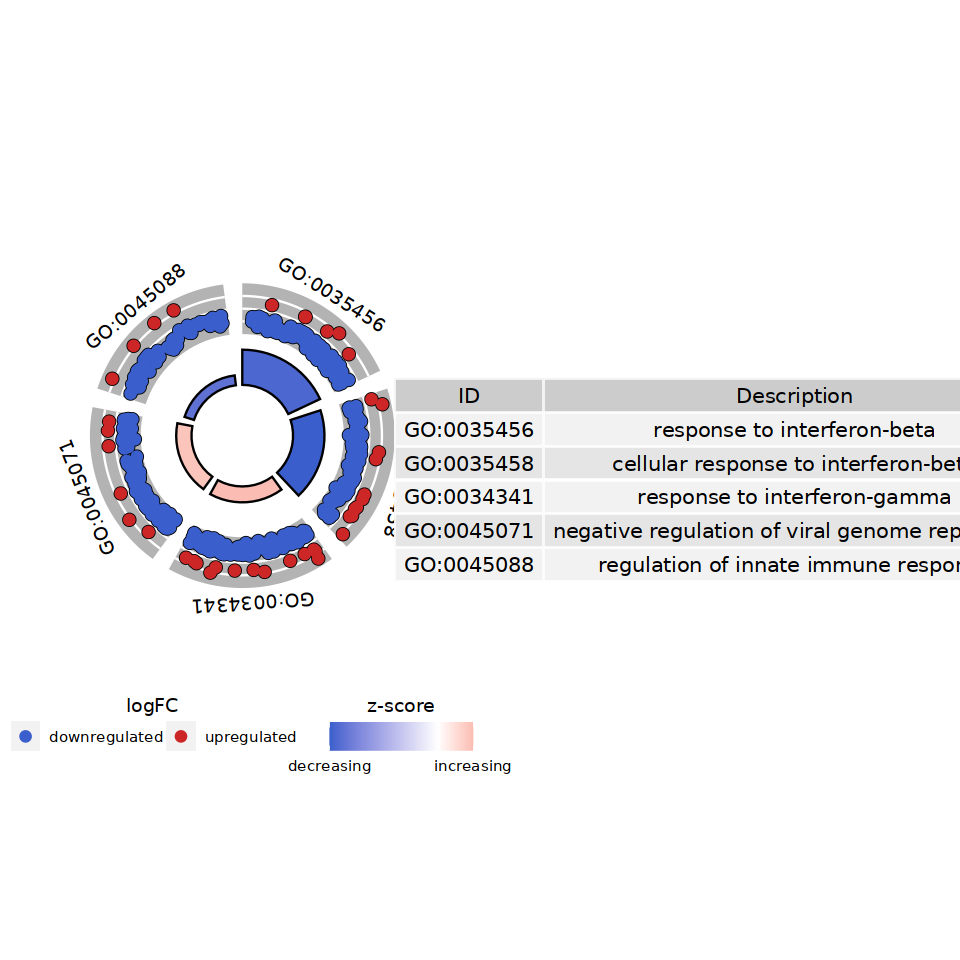

In [343]:
# windowsFonts(HEL=windowsFont("Helvetica CE 55 Roman"),
#              RMN=windowsFont("Times New Roman"),
#              ARL=windowsFont("Arial"),
#              JBM=windowsFont("JetBrains Mono"))

IDs <- c('GO:0035456', 'GO:0035458', 'GO:0034341', 'GO:0060700', 
         'GO:0045088', 'GO:0043901', 'GO:0045071', 'GO:0032069', 'GO:0019221')

GOCircle(circ,
         nsub = IDs,
         # nsub = 9, # 也可以指定数字
         rad1 = 2, rad2 = 3, # 内径、外径设置
         zsc.col = c('firebrick3', 'white', 'royalblue3'),# z-score颜色设置
         lfc.col = c('firebrick3', 'royalblue3'),# 上调下调颜色设置
         label.size = 4,
         label.fontface='bold',# 字体大小格式设置
         table.legend = T 
         # 右侧表格设置,为TRUE则无法设置theme
         # 如果解除表格加theme会释放出网格线和坐标轴
         ) +
  # 去除大背景颜色
  theme_bw() +
  theme(
    # 去除坐标轴文本、刻度线、标题
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    axis.title = element_blank(),
    # 去除坐标轴边框、图内网格线
    panel.border = element_blank(),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
    ) +
  # 字体相关设置
  theme(legend.text = element_text(size = 12),
        legend.title = element_text(size = 14),
        text = element_text(family="ARL"))

In [347]:
colnames(diff)[4] = 'PValue' 

In [349]:
write.csv(diff,file = 'diff_gene.csv')

In [350]:
write.csv(all@result,file = 'GO_results.csv')

In [355]:
run.circle = function(diffgene,GO_res,GOID){
    library(readxl)
    library(ggrepel)
    library(dplyr)
    library(GOplot)
    sig.gene = read.csv(diffgene,sep = ',',header = T)
    sig.gene = sig.gene %>% filter(abs(logFC) > logfc_cutoff & PValue < 0.01)
    colnames(sig.gene)[1] = 'symbol'
    sig.gene = sig.gene[,c(1,2,4)]
    colnames(sig.gene) = c('ID','logFC','adj_pval')
    
    go = read.csv(GO_res,sep = ',',header = T)
    go2 = go[,c(2,3,4,8,10)]
    
    GOID = read.table(GOID,header =F)
    go2 = go2 %>% filter(.,ID %in% GOID$V1)
    go2$geneID = gsub('/',',',go2$geneID)
    colnames(go2) = c('category','ID','term','adj_pval','genes')
    circ<-circle_dat(go2,sig.gene)
    sig.gene$ID = toupper(sig.gene$ID)
    chord <- chord_dat(circ, sig.gene, go2$term)
    pdf("chord.pdf",height = 19,width = 19)
    p = GOChord(chord,space = 0.02,gene.order = 'logFC',gene.space = 0.25,gene.size = 5)
    print(p)
    dev.off()
return(p)
}

diffgene = './diff_gene.csv'
GO_res = './GO_results.csv'
GOID = './GOid.txt'
logfc_cutoff = 1

 p = run.circle(diffgene,GO_res,GOID)

Warning message:
"Using size for a discrete variable is not advised."
Warning message:
"Removed 12 rows containing missing values (`geom_point()`)."


Warning message:
"Using size for a discrete variable is not advised."
Warning message:
"Removed 12 rows containing missing values (`geom_point()`)."


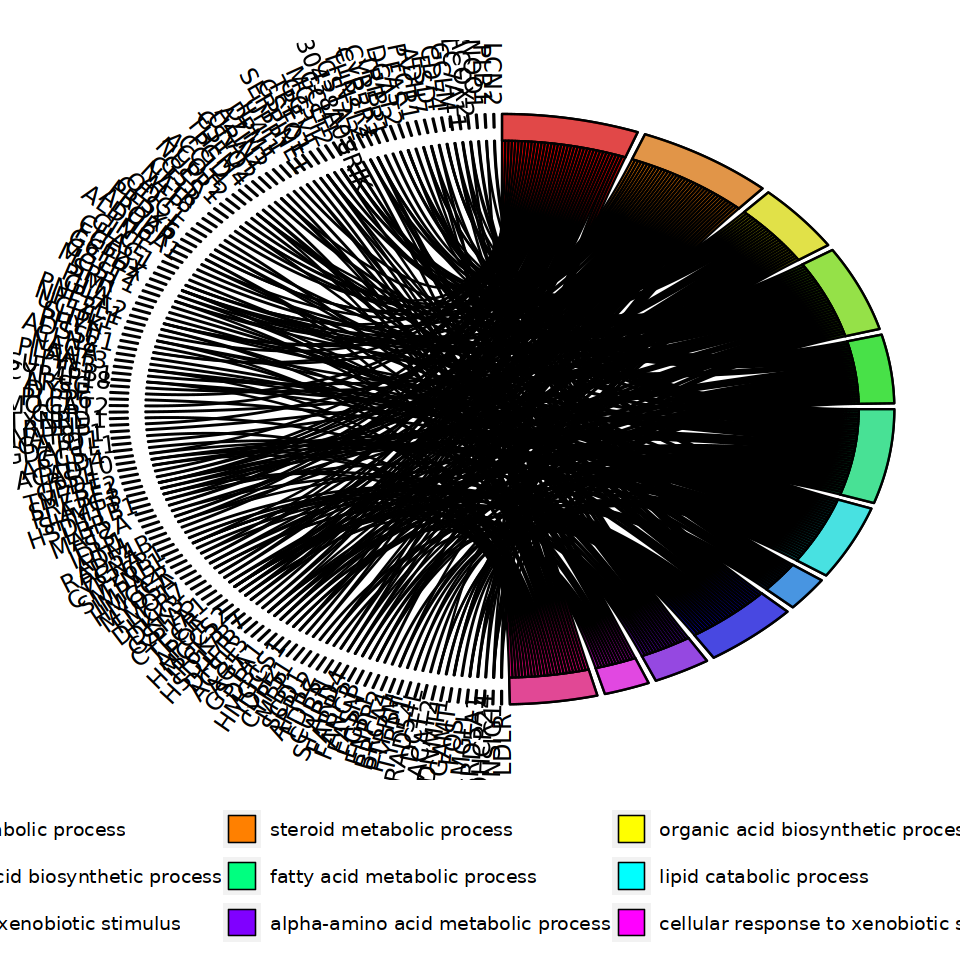

In [356]:
p

In [ ]:
## Rs07245 没有这个基因

[1] 6 6

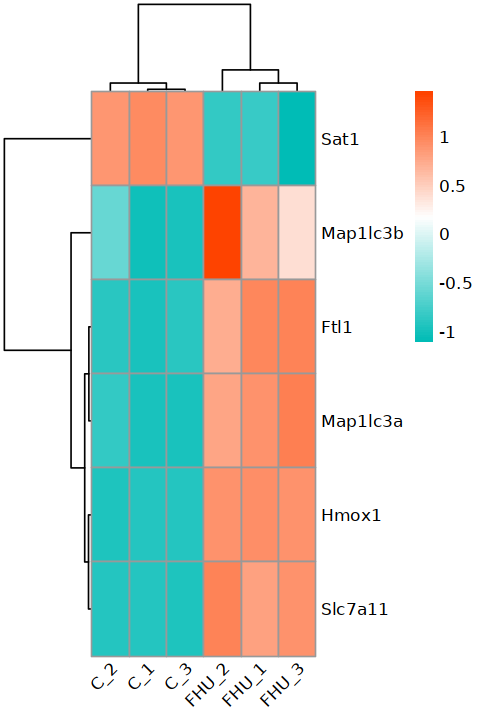

In [361]:
PATH = read.table('./pathway2.txt',header =T)

forplot = data[PATH$Label,]

library(pheatmap)

forplot = na.omit(forplot)

forplot = forplot[rowSums(forplot) >1,]

#da=log2(data1+1)
dat=t(scale(t(forplot))) # 'scale'可以对log(fpkm+1)数值进行归一化
#处理数据
dat[dat>2]=2
dat[dat<(-2)]= -2
dim(dat)

dat = dat[complete.cases(dat), ]

options(repr.plot.width = 4,repr.plot.height = 6)

xx = pheatmap(dat,
         cluster_rows = TRUE,
         cluster_cols = TRUE,
         show_rownames=TRUE,
         show_colnames = TRUE,
          scale="none",
          #cluster_cols = F,
          fontsize_row = 10,
          fontsize_col = 10,
          #color = colorRampPalette(c("navy", "white", "firebrick3"))(100),
          color = colorRampPalette(c("#00BCB6", "white", "#FE4300"))(100),#换颜色
          angle_col = 45 #修改横轴坐标名倾斜度
)

### 环状热图

In [362]:
PATH = read.table('./pathway.txt',header =T)
forplot = data[PATH$Label,]
library(pheatmap)
forplot = na.omit(forplot)
forplot = forplot[rowSums(forplot) >1,]
#da=log2(data1+1)
dat=t(scale(t(forplot))) # 'scale'可以对log(fpkm+1)数值进行归一化
#处理数据
dat[dat>2]=2
dat[dat<(-2)]= -2
dim(dat)
dat = dat[complete.cases(dat), ]
options(repr.plot.width = 4,repr.plot.height = 6)

[1] 70  6

In [365]:
library('ComplexHeatmap')
library('circlize')
library("RColorBrewer")

In [376]:
mat1  = dat

In [377]:
## https://blog.csdn.net/weixin_54004950/article/details/128225038

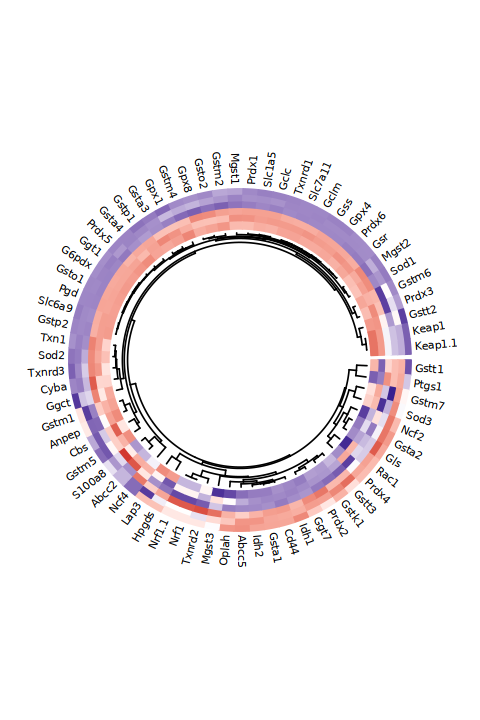

In [380]:
library(circlize)
library(ComplexHeatmap)
#绘制circoheatmap
col_fun1 = colorRamp2(c(-2, 0, 2), c("navy", "white", "firebrick3"))
circos.heatmap(mat1, col = col_fun1,dend.side = "inside",rownames.side = "outside")
#用于绘制legend
lgd = Legend(title = "mat1", col_fun = col_fun1)
grid.draw(lgd)
circos.clear()

In [382]:
options(repr.plot.height = 8,repr.plot.width = 8)

In [397]:
cn = colnames(mat1)

In [398]:
cn

[1] "C_1"   "C_2"   "C_3"   "FHU_1" "FHU_2" "FHU_3"

In [395]:
circos.clear()

Note: 6 points are out of plotting region in sector 'group', track '3'.



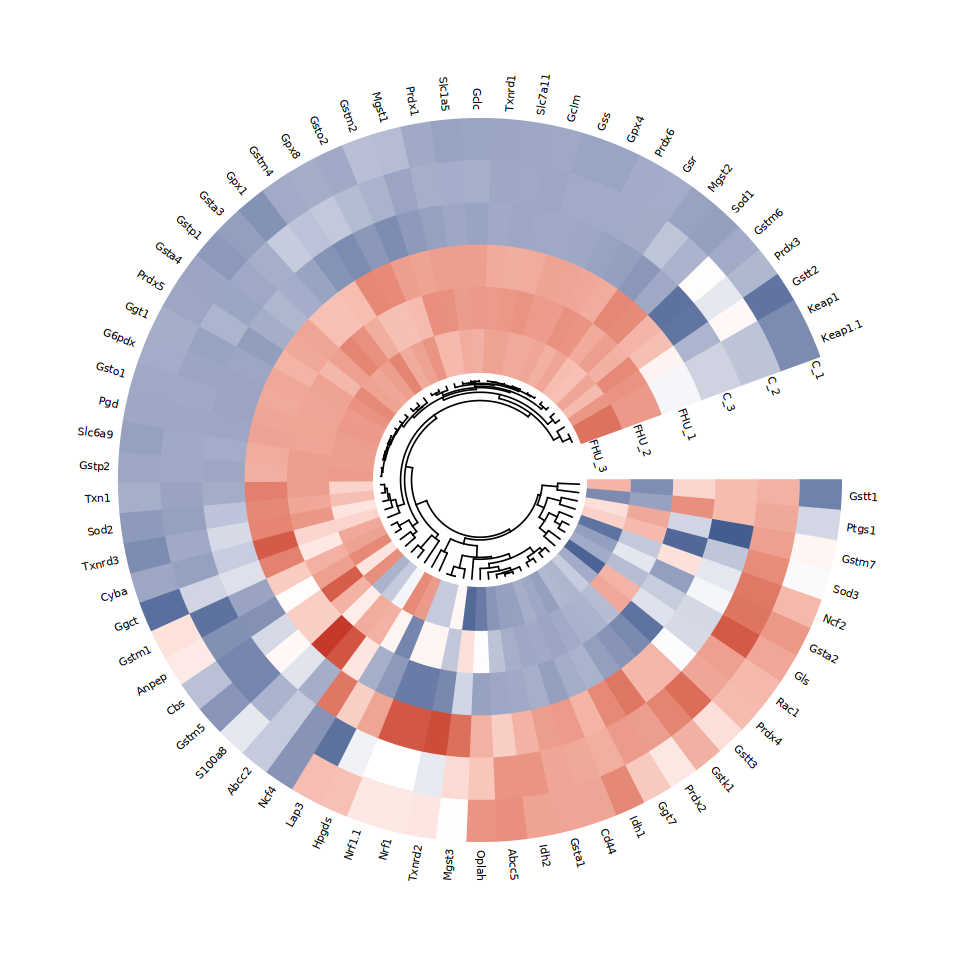

In [411]:
col_fun1 = colorRamp2(c(-2, 0, 2), c("#234B82", "white", "#BF291F"))
circos.par(gap.after = c(20))#空出一段用于添加label
circos.heatmap(mat1, col = col_fun1,dend.side = "inside",rownames.side = "outside",track.height = 0.6)
circos.track(track.index = get.current.track.index(), panel.fun = function(x, y) {
  if(CELL_META$sector.numeric.index == 1) { # the last sector
    cn = colnames(mat1)
    n = length(cn)
    circos.text(rep(CELL_META$cell.xlim[2], n) + convert_x(0.1, "mm"), #x坐标
                2+(1:n)*5,#y坐标
                rev(cn), #标签
                cex = 0.5, adj = c(0, 1), facing = "inside")
  }
}, bg.border = NA)
lgd = Legend(title = "mat1", col_fun = col_fun1)
grid.draw(lgd)
circos.clear()

In [415]:
upgene = diff %>% dplyr::filter(group == 'Up') %>% rownames()

In [424]:
dim(all@result)

[1] 1028   10

In [ ]:
a=unlist(strsplit(all@result[1,9], split="/"))

add.up.info = function(x){
    a=unlist(strsplit(x, split="/"))
    number = length(intersect(a,upgene))
    return(number)
}

single <- apply(as.data.frame(all@result[,9]),1,add.up.info  )

all@result = cbind(all@result,up = single)

all@result$down = all@result$Count -all@result$up